In [46]:
import scanpy as sc
import scvelo as scv
import numpy as np
import os
from anndata import AnnData as ad
from celldreamer.paths import DATA_DIR

In [47]:
sc.settings.datasetdir="../../project_folder/datasets/raw/"

Read dataset 

In [48]:
adata_raw = sc.datasets.pbmc3k()
adata_raw

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [49]:
# sc.pp.filter_genes(adata_raw, min_cells=5)

Get processed version for annotation

In [50]:
adata_processed = sc.datasets.pbmc3k_processed()
adata = adata_raw.copy()

Get full and downsampled dataset

In [51]:
adata_processed.X = adata_raw[list(adata_processed.obs.index), list(adata_processed.var.index)].X
adata_processed.layers["X_counts"] = adata_processed.X.copy()
adata_processed.obs = adata_processed.obs.rename(columns={"louvain": "cell_type"})

In [52]:
adata = adata[list(adata_processed.obs.index), :]
adata.layers["X_counts"] = adata.X.copy()
adata.obs = adata_processed.obs.copy()
sc.pp.filter_genes(adata, min_cells=5)

Keep subset of cells

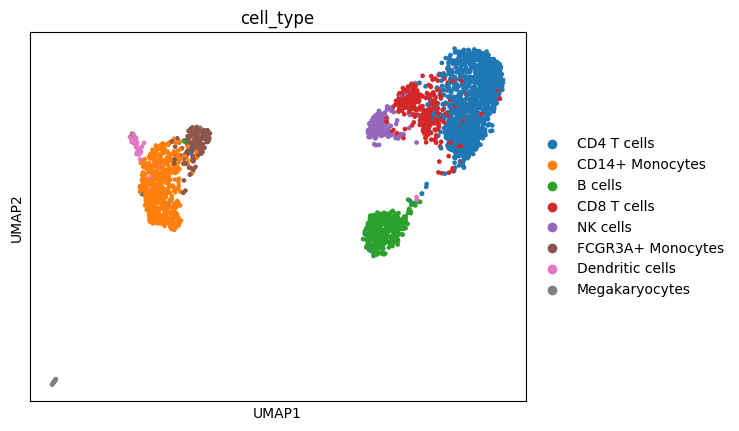

In [53]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="cell_type")

Train-test split

In [54]:
# Generate random indices for train and test sets
total_samples = adata.n_obs
train_frac = 0.7
train_size = int(total_samples * train_frac)
train_indices = np.random.choice(total_samples, size=train_size, replace=False)
test_indices = np.setdiff1d(np.arange(total_samples), train_indices)

# Separate data into train and test sets by indexing the Anndata object
train_adata = adata[train_indices, :]
test_adata = adata[test_indices, :]

Save

In [63]:
sc.AnnData.write_h5ad(adata, DATA_DIR / "processed_full_genome" / "pbmc3k" / "pbmc3k.h5ad")

In [64]:
sc.AnnData.write_h5ad(train_adata, DATA_DIR / "processed_full_genome" / "pbmc3k" / "pbmc3k_train.h5ad")

In [65]:
sc.AnnData.write_h5ad(test_adata, DATA_DIR / "processed_full_genome" / "pbmc3k" / "pbmc3k_test.h5ad")